<a href="https://colab.research.google.com/github/adityajain2407/feb23-dav-3/blob/main/feb23_feature_engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("loan.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
df.drop(columns = ["Loan_ID"], inplace = True)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.describe(include = ["object"])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [13]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.shape

(614, 12)

In [15]:
data = df

In [16]:
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [17]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [18]:
cat_cols.remove('Loan_Status') # Loan_Status is target, so remove from features
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [19]:
#univariate analysis

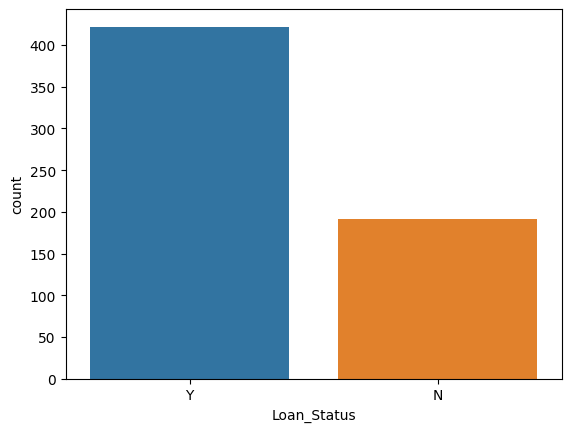

In [20]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

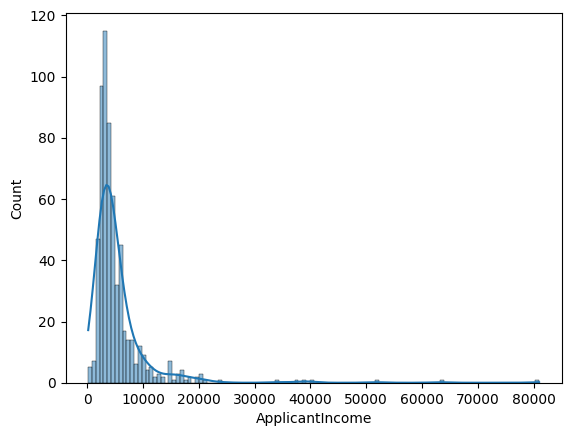

In [21]:
sns.histplot(data["ApplicantIncome"], kde=True)

In [22]:
data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [23]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]

# H0: Income and Loan status are independent
# Ha: Dependent
ttest_ind(a, b)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)

In [24]:
'''
Obs: p-value very high : Fail to reject H0 --> Loan status and income are independent


'''

'\nObs: p-value very high : Fail to reject H0 --> Loan status and income are independent\n\n\n'

In [25]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']

In [26]:
data["Income_bin"] = pd.cut(data["ApplicantIncome"], bins, labels = group)

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [28]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


In [29]:
from scipy.stats import chi2_contingency
val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
print(val)

# H0: Loan status and Income are independent
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 13  27]
 [  3   6]
 [  1   2]]


Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

In [30]:
#HW--> try to do same analysis with total income

data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


In [31]:
#with income, loan amoiunt and term

In [32]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
#convert to years
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

In [34]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0


In [35]:
#can do univariate analysis over here

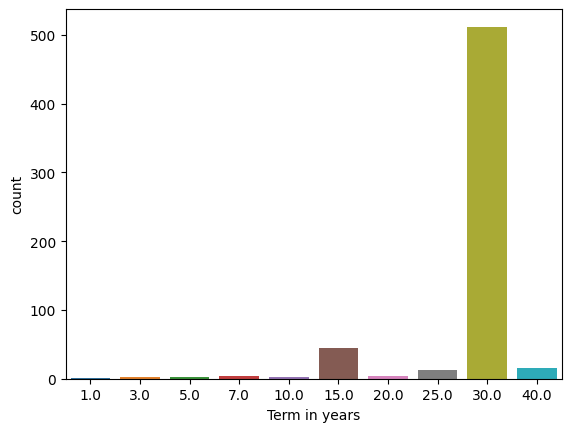

In [36]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

In [37]:
#lets create a new varialbe called emi-->

data["Loan_Amount_per_year"] = data["LoanAmount"]/data["Loan_Amount_Term"]
#aproximating for interest, etc

In [38]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,4.700000


In [39]:
data['EMI'] = data["Loan_Amount_per_year"]*1000/12
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,4.700000,391.666667


In [40]:
data["Able_to_pay_emi"] = (data["TotalIncome"]*0.3 > data["EMI"]).astype("int")

In [41]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,Loan_Amount_per_year,EMI,Able_to_pay_emi
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,4.700000,391.666667,1


In [42]:
vals = pd.crosstab(data['Able_to_pay_emi'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_to_pay_emi,,
0,19,21
1,173,401


In [43]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=4.467271867611989, pvalue=0.03455011506195388, dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))

In [44]:
#significance level --> 0.05
'''
As p < alpha--> reject H0
Conclusion: able_to_pay_emi and LoanStatus are dependent
'''

'\nAs p < alpha--> reject H0\nConclusion: able_to_pay_emi and LoanStatus are dependent\n'

#Feature Engineering lec-2

In [45]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [46]:
data["Dependents"].replace("3+", 3, inplace = True)

In [47]:
data["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [48]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [49]:
data.isna().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
Income_bin               0
TotalIncome              0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_emi          0
dtype: int64

In [50]:
(data.isna().sum()/len(data))*100

Gender                  2.117264
Married                 0.488599
Dependents              2.442997
Education               0.000000
Self_Employed           5.211726
ApplicantIncome         0.000000
CoapplicantIncome       0.000000
LoanAmount              3.583062
Loan_Amount_Term        2.280130
Credit_History          8.143322
Property_Area           0.000000
Loan_Status             0.000000
Income_bin              0.000000
TotalIncome             0.000000
Loan_Amount_per_year    5.863192
EMI                     5.863192
Able_to_pay_emi         0.000000
dtype: float64

In [51]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [52]:
data["Credit_History"].isna().sum()

50

In [53]:
pd.crosstab(data["Credit_History"],data["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [54]:
chi2_contingency(pd.crosstab(data['Credit_History'], data['Loan_Status']))

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

In [ ]:
'''
Obs: p-value is very low --> Reject H0 --> Loan status is dependent on Credit history
'''

In [55]:
data["Credit_History"] = data["Credit_History"].fillna(2)
data["Credit_History"].value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

In [56]:
data["Self_Employed"].isna().sum()

32

In [57]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [58]:
pd.crosstab(data['Self_Employed'], data['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [59]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[157.21649485, 342.78350515],
       [ 25.78350515,  56.21649485]]))

In [60]:
data["Self_Employed"]=data["Self_Employed"].fillna("Other")

In [61]:
data["Self_Employed"].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

In [62]:
chi2_contingency(pd.crosstab(data['Self_Employed'], data['Loan_Status']))

Chi2ContingencyResult(statistic=0.15849843135909122, pvalue=0.9238096679003514, dof=2, expected_freq=array([[156.35179153, 343.64820847],
       [ 10.00651466,  21.99348534],
       [ 25.64169381,  56.35830619]]))

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [65]:
a.mean()

0    20.0
dtype: float64

In [66]:
SimpleImputer(strategy = "mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [67]:
SimpleImputer(strategy = "most_frequent").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [68]:
a.mode()

,0
0,10.0


In [69]:
# Missing numeric columns --> more in ML modules

num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

median_imputer = SimpleImputer(strategy = 'median')

for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [70]:
data.isna().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
TotalIncome              0
Loan_Amount_per_year     0
EMI                      0
Able_to_pay_emi          0
dtype: int64

In [71]:
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent') # mode

for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [72]:
data.isna().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Income_bin              0
TotalIncome             0
Loan_Amount_per_year    0
EMI                     0
Able_to_pay_emi         0
dtype: int64

In [73]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,Loan_Amount_per_year,EMI,Able_to_pay_emi
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,Y,medium,5849.0,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,4.700000,391.666667,1


#Category to Numerical

In [74]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [75]:
col = "Loan_Status"
data[col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [76]:
col = "Property_Area"
data[col].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [77]:
col = "Loan_Status"
data[col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
label_encoder = LabelEncoder()

In [80]:
col = "Loan_Status"
data[col] = label_encoder.fit_transform(data[col])

In [81]:
data[col].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [82]:
col = "Gender"
data[col].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [83]:
data[col] = label_encoder.fit_transform(data[col])

In [84]:
data[col].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [85]:
col = "Married"
data[col].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [86]:
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [87]:
col = "Education"
data[col].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [88]:
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [89]:
col = "Self_Employed"
data[col].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

In [90]:
col = "Property_Area"
data[col].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

ModuleNotFoundError: ignored

In [93]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.5 MB/s eta 0:00:00


In [98]:
from category_encoders import TargetEncoder


In [99]:
pd.crosstab(data["Property_Area"], data["Loan_Status"])

Loan_Status,0,1
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [100]:
pd.crosstab(data["Property_Area"], data["Loan_Status"],normalize="index")

Loan_Status,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


In [101]:
# pd.crosstab(data["Property_Area"], data["Loan_Status"],margins=True)

In [102]:
col="Property_Area"
te=TargetEncoder()
data[col]=te.fit_transform(data[col],data["Loan_Status"])
data[col].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                614 non-null    int64   
 1   Married               614 non-null    int64   
 2   Dependents            614 non-null    object  
 3   Education             614 non-null    int64   
 4   Self_Employed         614 non-null    object  
 5   ApplicantIncome       614 non-null    int64   
 6   CoapplicantIncome     614 non-null    float64 
 7   LoanAmount            614 non-null    float64 
 8   Loan_Amount_Term      614 non-null    float64 
 9   Credit_History        614 non-null    float64 
 10  Property_Area         614 non-null    float64 
 11  Loan_Status           614 non-null    int64   
 12  Income_bin            614 non-null    category
 13  TotalIncome           614 non-null    float64 
 14  Loan_Amount_per_year  614 non-null    float64 
 15  EMI   

In [104]:
col="Self_Employed"
data[col].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

In [105]:
col="Self_Employed"
te=TargetEncoder()
data[col]=te.fit_transform(data[col],data["Loan_Status"])
data[col].value_counts()

0.686000    500
0.682936     82
0.711469     32
Name: Self_Employed, dtype: int64

In [106]:
col="Dependents"
te=TargetEncoder()
data[col]=te.fit_transform(data[col],data["Loan_Status"])
data[col].value_counts()

0.686111    360
0.647070    102
0.752455    101
0.648793     51
Name: Dependents, dtype: int64

In [107]:
data.dtypes

Gender                     int64
Married                    int64
Dependents               float64
Education                  int64
Self_Employed            float64
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area            float64
Loan_Status                int64
Income_bin              category
TotalIncome              float64
Loan_Amount_per_year     float64
EMI                      float64
Able_to_pay_emi            int64
dtype: object

In [108]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

[]